In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import folium
from folium.plugins import HeatMap
import plotly.express as px
from ipywidgets import interact, widgets
from IPython.display import display
import geopandas as gpd
import contextily as ctx
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
%matplotlib inline

In [2]:
df1 = pd.read_csv('Crimes_-_2001_to_Present.csv')

In [3]:
#df1 = df.sample(n = 1000, random_state = 42)

In [5]:
df1.head()

ID Case Number                    Date                  Block  IUCR  \
0  13291431    JG520855  11/28/2023 12:00:00 AM  017XX W SUNNYSIDE AVE  0810   
1  13290510    JG520034  11/28/2023 12:00:00 AM   014XX W MONTROSE AVE  0860   
2  13291204    JG520808  11/28/2023 12:00:00 AM   043XX W WABANSIA AVE  0820   
3  13291474    JG521214  11/28/2023 12:00:00 AM      029XX W FULTON ST  0910   
4  13290739    JG520264  11/28/2023 12:00:00 AM   135XX S TORRENCE AVE  0910   

          Primary Type     Description  \
0                THEFT       OVER $500   
1                THEFT    RETAIL THEFT   
2                THEFT  $500 AND UNDER   
3  MOTOR VEHICLE THEFT      AUTOMOBILE   
4  MOTOR VEHICLE THEFT      AUTOMOBILE   

                     Location Description  Arrest  Domestic  ...  Ward  \
0                                  STREET   False     False  ...  47.0   
1                       CONVENIENCE STORE   False     False  ...  47.0   
2                                  STREET   False     False  ...  26.0   
3                             GAS STATION   False     False  ...  27.0   
4  PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False  ...  10.0   

   Community Area  FBI Code  X Coordinate Y Coordinate  Year  \
0             3.0        06     1163768.0    1929930.0  2023   
1             6.0        06     1165635.0    1929313.0  2023   
2            23.0        06     1147025.0    1910941.0  2023   
3            27.0        07     1156638.0    1901864.0  2023   
4            55.0        07     1195791.0    1815834.0  2023   

               Updated On   Latitude  Longitude                       Location  
0  12/05/2023 03:41:35 PM  41.963361 -87.673266  (41.963360806, -87.673266097)  
1  12/05/2023 03:41:35 PM  41.961628 -87.666419  (41.961628063, -87.666419454)  
2  12/05/2023 03:41:35 PM  41.911591 -87.735312   (41.911590736, -87.73531182)  
3  12/05/2023 03:41:35 PM  41.886493 -87.700243  (41.886493289, -87.700242574)  
4  12/05/2023 03:41:35 PM  41.649538 -87.559309  (41.649538486, -87.559308653)  

[5 rows x 22 columns]

In [6]:
df1.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [7]:
df1.isna().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     12123
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614854
Community Area          613478
FBI Code                     0
X Coordinate             87613
Y Coordinate             87613
Year                         0
Updated On                   0
Latitude                 87613
Longitude                87613
Location                 87613
dtype: int64

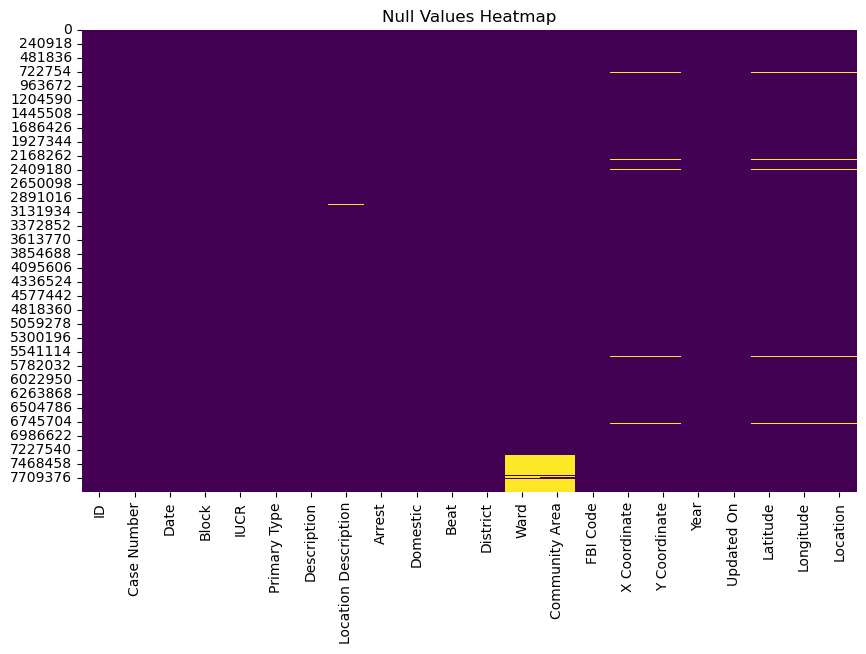

In [8]:
#plotting null values
plt.figure(figsize=(10, 6))
sns.heatmap(df1.isnull(), cmap='viridis', cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [9]:
#Dropping columns which are of no use
columns_to_drop = ['Description', 'Beat','Updated On','X Coordinate','Y Coordinate']

df1 = df1.drop(columns=columns_to_drop)

In [10]:
#Dropping null values
df1 = df1.dropna()

In [11]:
#Converting dates into Year, Month, Day and Time
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month_name()
df1['Day'] = df1['Date'].dt.dayofweek
df1['Hour'] = df1['Date'].dt.hour


C:\Users\hetan\AppData\Local\Temp\ipykernel_13884\3375108245.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Date'] = pd.to_datetime(df1['Date'])


In [12]:
# Crime Rate Trends
yearly_crime_counts = df1['Year'].value_counts().sort_index()

# Seasonal Variations in Crime
monthly_crime_counts = df1['Month'].value_counts()
months_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 
                  'July', 'August', 'September', 'October', 'November', 'December']
monthly_crime_counts = monthly_crime_counts.reindex(months_ordered)

# Types of Crimes
top_crimes = df1['Primary Type'].value_counts().head(5)
top_crimes_over_time = df1[df1['Primary Type'].isin(top_crimes.index)].groupby(['Year', 'Primary Type']).size().unstack()

# Displaying the derived insights
#yearly_crime_counts, monthly_crime_counts, top_crimes, top_crimes_over_time.head(10)

<Figure size 1500x1000 with 0 Axes>

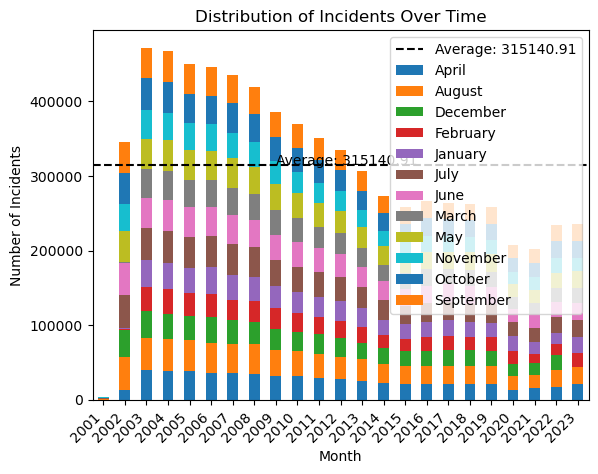

In [13]:
# Plot the distribution of incidents over time
plt.figure(figsize=(15, 10))
ax = df1.groupby(['Year', 'Month']).size().unstack().plot(kind='bar', stacked=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Calculate the average number of incidents per month
average_values = df1.groupby(['Year']).size().mean()
ax.axhline(y=average_values, color='Black', linestyle='--', label=f'Average: {average_values:.2f}')
ax.text(8, average_values + 5 , f'Average: {average_values:.2f}', color='Black')  # Display the average value

plt.title('Distribution of Incidents Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()

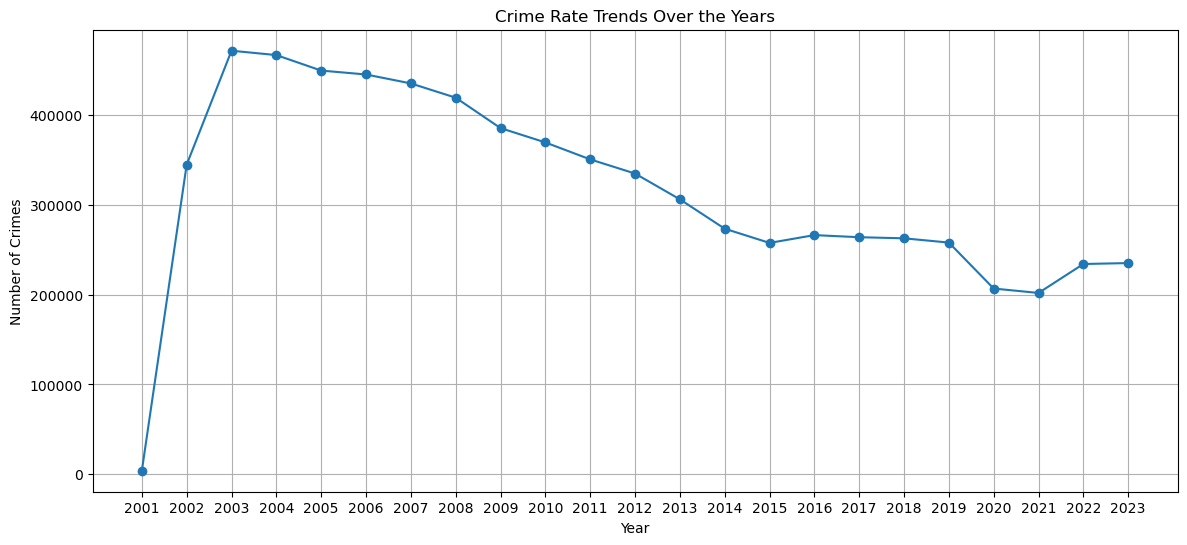

In [14]:
# Plotting crime rate trend over the years
plt.figure(figsize=(14, 6))
yearly_crime_counts.plot(kind='line', marker='o')
plt.title('Crime Rate Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.xticks(np.arange(min(yearly_crime_counts.index), max(yearly_crime_counts.index)+1, 1.0))
plt.show()

In [17]:
months_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 
                  'July', 'August', 'September', 'October', 'November', 'December']
monthly_crime_counts = df1['Month'].value_counts().reindex(months_ordered).reset_index()
monthly_crime_counts.columns = ['Month', 'Number of Crimes']

# Create the bar chart using Plotly
fig = px.bar(monthly_crime_counts, x='Month', y='Number of Crimes', color='Month',
             labels={'Number of Crimes': 'Number of Crimes', 'Month': 'Month'},
             title='Monthly Crime Distribution',
             template='plotly_white')

# Display the plot
fig.show()

In [18]:
grouped_data = df1.groupby(['Month', 'Primary Type']).size().reset_index(name='Count')
pivot_data = grouped_data.pivot(index='Month', columns='Primary Type', values='Count').fillna(0)

# Ensure the months are in the correct order
months_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 
                  'July', 'August', 'September', 'October', 'November', 'December']
pivot_data = pivot_data.reindex(months_ordered)

# Create the stacked bar chart
fig = px.bar(pivot_data, x=pivot_data.index, y=pivot_data.columns,
             labels={'value': 'Number of Crimes', 'index': 'Month'},
             title='Monthly Crime Distribution by Type',
             template='plotly_white')

# Update layout to stack bars
fig.update_layout(barmode='stack')

# Display the plot
fig.show()

In [20]:
weekday_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
               4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Now group and sort by the weekday
daywise_crime_counts = df1['Day'].map(weekday_map).value_counts().reindex(['Monday'
                        , 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
daywise_crime_counts.columns = ['Day', 'Number of Crimes']

# Create the bar chart
fig = px.bar(daywise_crime_counts, x='Day', y='Number of Crimes', color = 'Day', 
             labels={'Day': 'Day of the Week', 'Number of Crimes': 'Number of Crimes'},
             title='Day-wise Crime Distribution', 
             template='plotly_white')

# Display the plot
fig.show()

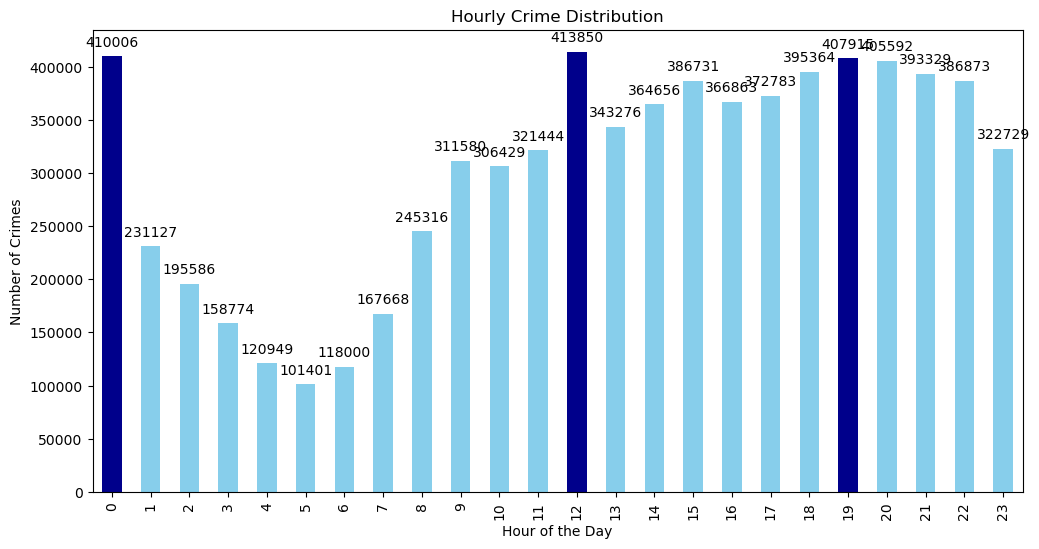

In [21]:
plt.figure(figsize=(12, 6))
hourly_crime_counts = df1['Hour'].value_counts().sort_index()
# Get the top 3 hours
top_3_hours = hourly_crime_counts.nlargest(3).index

# Color bars based on whether they're in the top 3
colors = ['darkblue' if hour in top_3_hours else 'skyblue' for hour in hourly_crime_counts.index]

# Create the bar plot
ax = hourly_crime_counts.plot(kind='bar', color=colors)
plt.title('Hourly Crime Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')

# Adding the number of crimes on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [22]:
total_crime_counts = df1['Primary Type'].value_counts()

# Calculating percentage for each crime
percentage = total_crime_counts / total_crime_counts.sum() * 100

# Finding the most committed crime overall
most_common_crime = percentage.idxmax()

# Creating an interactive bar chart with Matplotlib and ipywidgets
@interact(year=widgets.Dropdown(options=['All'] + sorted(df1['Year'].unique()), value='All'))
def plot_crime_percentage(year):
    if year == 'All':
        filtered_data = df1
        title = 'Percentage of Crimes by Type (All Years)'
    else:
        filtered_data = df1[df1['Year'] == int(year)]
        title = f'Percentage of Crimes by Type in {year}'

    filtered_percentage = filtered_data['Primary Type'].value_counts(normalize=True) * 100
    filtered_percentage = filtered_percentage.sort_values(ascending=True)

    plt.figure(figsize=(12, 6))
    ax = filtered_percentage.plot(kind='barh', color='skyblue')
    plt.title(title)
    plt.xlabel('Percentage (%)')
    plt.ylabel('Crime Type')

    for index, value in enumerate(filtered_percentage):
        ax.text(value, index, f'{value:.2f}%', ha='left', va='center')

    plt.show()

interactive(children=(Dropdown(description='year', options=('All', 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2…

In [24]:
total_crime_counts = df1['Primary Type'].value_counts()

# Calculating percentage for each crime
percentage = total_crime_counts / total_crime_counts.sum() * 100

# Grouping crimes with percentage lower than 2% into 'Other' category
threshold = 2
filtered_crimes = percentage[percentage >= threshold]
filtered_crimes['Others'] = percentage[percentage < threshold].sum()

# Creating an interactive pie chart with Matplotlib and ipywidgets
@interact(year=widgets.Dropdown(options=['All'] + sorted(df1['Year'].unique()), value='All'))
def plot_crime_percentage_pie(year):
    if year == 'All':
        filtered_data = df1
        title = 'Percentage of Crimes (All Years)'
    else:
        filtered_data = df1[df1['Year'] == int(year)]
        title = f'Percentage of Crimes in {year}'

    filtered_crime_counts = filtered_data['Primary Type'].value_counts()
    filtered_percentage = filtered_crime_counts / filtered_crime_counts.sum() * 100

    # Grouping crimes with percentage lower than 2% into 'Other' category
    filtered_crimes = filtered_percentage[filtered_percentage >= threshold]
    filtered_crimes['Others'] = filtered_percentage[filtered_percentage < threshold].sum()

    plt.figure(figsize=(8, 8))
    plt.pie(filtered_crimes, labels=filtered_crimes.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

interactive(children=(Dropdown(description='year', options=('All', 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2…

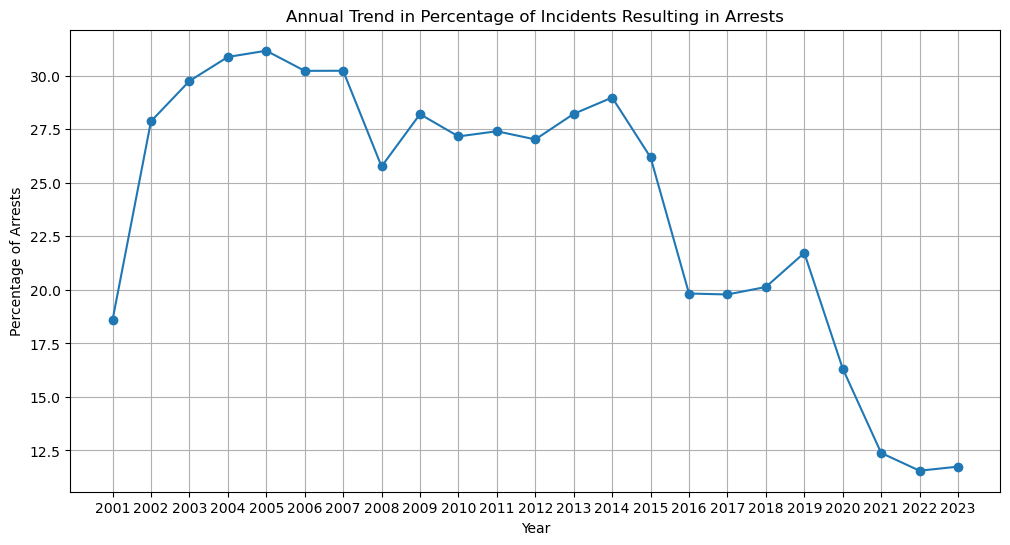

In [26]:
#Plotting Annual trend for arrest
arrest_data_yearly = df1.groupby('Year')['Arrest'].value_counts(normalize=True).unstack() * 100

# Selecting only the percentage of incidents where an arrest was made
arrest_percentage_yearly = arrest_data_yearly[True]

# Plotting the line graph
plt.figure(figsize=(12, 6))
arrest_percentage_yearly.plot(kind='line', marker='o')
plt.title('Annual Trend in Percentage of Incidents Resulting in Arrests')
plt.xlabel('Year')
plt.ylabel('Percentage of Arrests')
plt.grid(True)
plt.xticks(np.arange(min(arrest_percentage_yearly.index), max(arrest_percentage_yearly.index)+1, 1.0))
plt.show()

<Figure size 2000x1600 with 0 Axes>

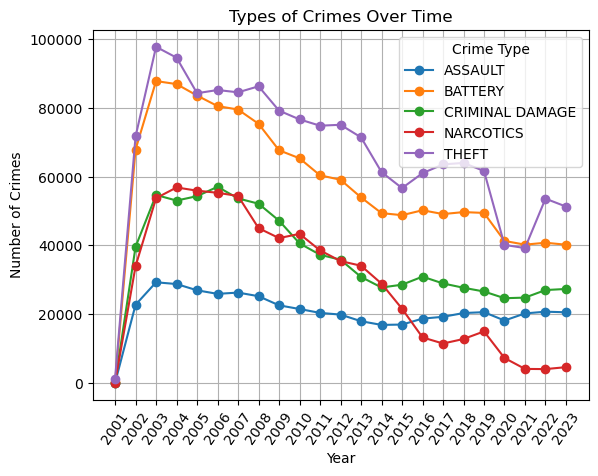

In [23]:
plt.figure(figsize=(20, 16))
top_crimes_over_time.plot(kind='line', marker='o')
plt.title('Types of Crimes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)

# Rotating x-axis labels by 45 degrees
plt.xticks(np.arange(min(top_crimes_over_time.index), max(top_crimes_over_time.index)+1, 1.0), rotation=55)

plt.legend(title='Crime Type')
plt.show()

In [25]:
#Plotting percentage of Arrest against Crimes
@interact(year=widgets.Dropdown(options=['All'] + [str(y) for y in sorted(df1['Year'].unique())], value='All'))
def plot_arrest_percentage(year):
    if year == 'All':
        filtered_data = df1
        title = 'Percentage of Incidents Resulting in Arrests (All Years)'
    else:
        filtered_data = df1[df1['Year'] == int(year)]  # Convert year back to integer for filtering
        title = f'Percentage of Incidents Resulting in Arrests in {year}'

    arrest_percentage = filtered_data['Arrest'].value_counts(normalize=True) * 100

    plt.figure(figsize=(8, 8))
    arrest_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightgreen'])
    plt.title(title)
    plt.show()

interactive(children=(Dropdown(description='year', options=('All', '2001', '2002', '2003', '2004', '2005', '20…

In [27]:
df2 = df1.sample(n = 15000, random_state = 42)

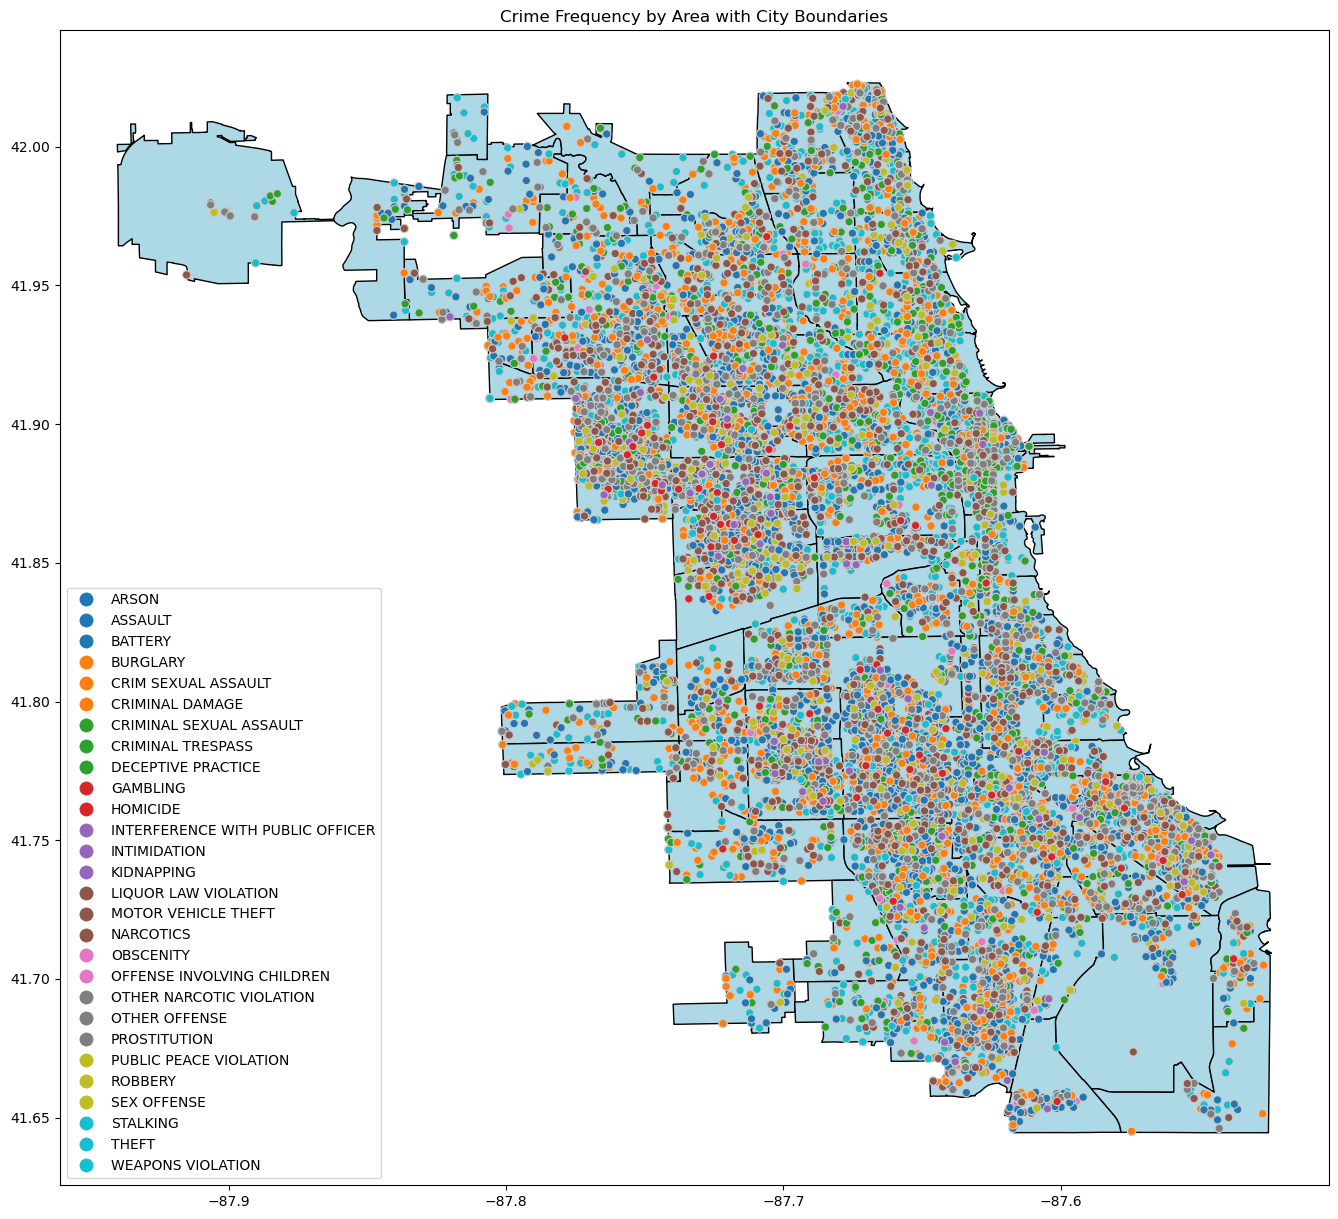

In [28]:
# Assuming 'city_boundaries' is a GeoDataFrame containing city boundaries
# Load the GeoDataFrame with city boundaries
gdf = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2['Longitude'], df2['Latitude']))
city_boundaries = gpd.read_file("community.shp")
# Merge crime counts with the GeoDataFrame
crime_counts = df2['Primary Type'].value_counts()
gdf = gdf.merge(crime_counts, left_on='Primary Type', right_index=True)

# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(30, 15))

# Plot city boundaries
city_boundaries.plot(ax=ax, color='lightblue', edgecolor='black')

# Plot crime frequency by area
gdf.plot(column='Primary Type', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

plt.title('Crime Frequency by Area with City Boundaries')
plt.show()


In [34]:
def plot_crimes_by_hour_and_type(hour_range, crime_type):
    start_hour, end_hour = hour_range
    # Filter the data based on the hour range and crime type
    filtered_data = df2[(df2['Hour'] >= start_hour) & (df2['Hour'] <= end_hour) & (df2['Primary Type'] == crime_type)]

    # Create a map centered around an average location from the filtered data
    if not filtered_data.empty:
        map_center = [filtered_data['Latitude'].mean(), filtered_data['Longitude'].mean()]
        crime_map = folium.Map(location=map_center, zoom_start=12)

        # Add markers for each crime
        for _, row in filtered_data.iterrows():
            folium.CircleMarker(
                location=[row['Latitude'], row['Longitude']],
                radius= 3,
                color= 'red',
                fill=True,
                fill_color= 'red',
                popup=f"{row['Primary Type']} at {row['Hour']}:00"
            ).add_to(crime_map)

        # Display the map
        display(crime_map)
    else:
        print(f"No {crime_type} crimes recorded in the selected hour range.")

# Create an hour range slider
hour_slider = widgets.SelectionRangeSlider(
    options=list(range(24)),
    index=(0, 23),
    description='Hour Range',
    disabled=False
)

# Create a crime type dropdown
crime_type_dropdown = widgets.Dropdown(
    options=df2['Primary Type'].unique(),
    description='Crime Type',
    disabled=False
)

# Interactive widget
widgets.interactive(plot_crimes_by_hour_and_type, hour_range=hour_slider, crime_type=crime_type_dropdown)


interactive(children=(SelectionRangeSlider(description='Hour Range', index=(0, 23), options=(0, 1, 2, 3, 4, 5,…